# Visualizing the History of Nobel Prize Winners

The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

In [156]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Start coding here!

Analyze Nobel Prize winner data to identify patterns by answering specific questions.

- Load the nobel.csv dataset and identify the most commonly awarded gender and birth country, storing the string answers as top_gender and top_country.

In [157]:
nobel = pd.read_csv('data/nobel.csv', header = 0)

print(nobel.head())
print(nobel.isna().any())

   year    category  ... death_city death_country
0  1901   Chemistry  ...     Berlin       Germany
1  1901  Literature  ...   Châtenay        France
2  1901    Medicine  ...    Marburg       Germany
3  1901       Peace  ...     Heiden   Switzerland
4  1901       Peace  ...      Paris        France

[5 rows x 18 columns]
year                    False
category                False
prize                   False
motivation               True
prize_share             False
laureate_id             False
laureate_type           False
full_name               False
birth_date               True
birth_city               True
birth_country            True
sex                      True
organization_name        True
organization_city        True
organization_country     True
death_date               True
death_city               True
death_country            True
dtype: bool


In [158]:
top_gender = nobel['sex'].value_counts().idxmax()
top_country = nobel['birth_country'].value_counts().idxmax()

print(top_gender)
print(top_country)

Male
United States of America


- Calculate the proportion of US-born winners per decade and save it as a DataFrame named prop_usa_winners with columns decade(INT) and usa_born_winner(FLOAT); visualize this with a relational line plot and assign it to ax1.

In [159]:
# Calculate Decades
nobel['decade'] = (nobel['year'] // 10) * 10

prop_usa_winners = nobel.groupby('decade')['birth_country'].apply(lambda x: (x == "United States of America").sum() / len(x)).reset_index()

prop_usa_winners.columns = ['decade', 'usa_born_winner']

print(prop_usa_winners)

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000


In [160]:
# Alternative solution
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'

nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)

prop_usa_winners = nobel.groupby('decade', as_index = False)['usa_born_winner'].mean()

print(prop_usa_winners)

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.314050
12    2020         0.360000


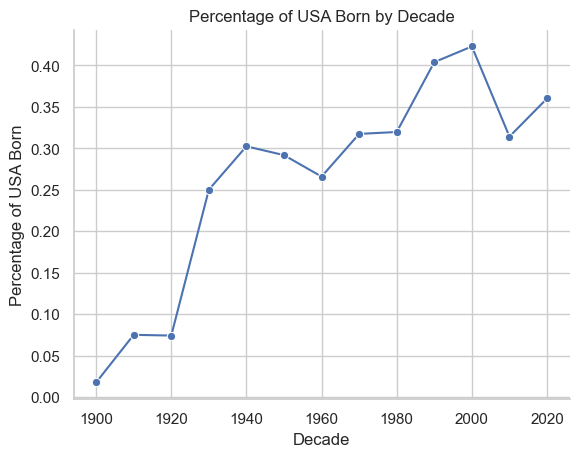

In [161]:
# Visualize

# Plotting the line plot using Seaborn
sns.set(style='whitegrid')  # Set style for the plot

ax1 = sns.lineplot(data = prop_usa_winners, x = 'decade', y = 'usa_born_winner', marker = 'o')

ax1.set_xlabel('Decade')
ax1.set_ylabel('Percentage of USA Born')
ax1.set_title('Percentage of USA Born by Decade')

sns.despine() 
plt.show()


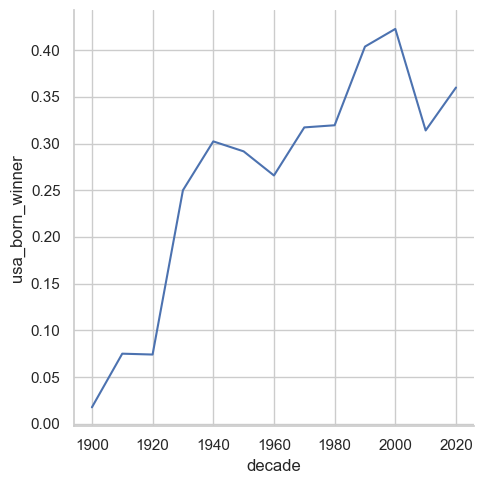

In [162]:
# Alternative Solution

# Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")

- Calculate the proportion of female laureates per decade and category. Save it as a DataFrame called prop_female_winners with the columns decade, category, and female_winner(FLOAT); visualize this with a relational line plot assigned to ax2.

In [163]:
prop_female_winners = nobel.groupby(['decade', 'category'])['sex'].apply(lambda x: (x == "Female").sum() / len(x)).reset_index()

prop_female_winners.columns = ['decade', 'category', 'female_winner']
print(prop_female_winners.head())

   decade    category  female_winner
0    1900   Chemistry       0.000000
1    1900  Literature       0.100000
2    1900    Medicine       0.000000
3    1900       Peace       0.071429
4    1900     Physics       0.076923


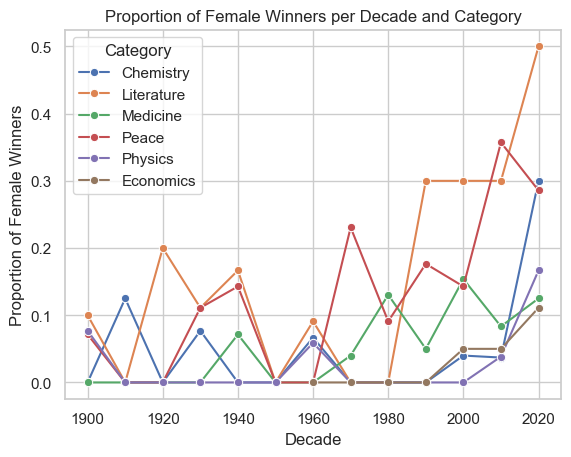

In [164]:
sns.set(style = 'whitegrid')

ax2 = sns.lineplot(data=prop_female_winners, x='decade', y='female_winner', hue='category', marker='o', palette='deep')

ax2.set_xlabel('Decade')
ax2.set_ylabel('Proportion of Female Winners')
ax2.set_title('Proportion of Female Winners per Decade and Category')

plt.legend(title = 'Category')

plt.show()

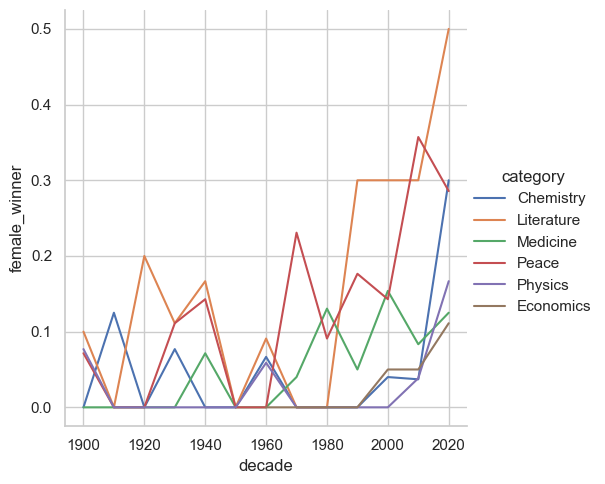

In [165]:
# Alternative Solution

# Calculating the proportion of female laureates per decade
nobel['female_winner'] = nobel['sex'] == 'Female'
prop_female_winners = nobel.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()


ax2 = sns.relplot(x='decade', y='female_winner', hue='category', data=prop_female_winners, kind="line")

- Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category.

In [166]:
female_data = nobel[nobel['sex'] == 'Female']

min_year_female = female_data['year'].min()

first_woman_name = female_data[female_data['year'] == min_year_female][['full_name']]
first_woman_category = female_data[female_data['year'] == min_year_female][['category']]

print(first_woman_category)
print(first_woman_name)


   category
19  Physics
                      full_name
19  Marie Curie, née Sklodowska


In [167]:
# Alternative Solution

# Finding the first woman to win a Nobel Prize
nobel_women = nobel[nobel['female_winner']]

min_row = nobel_women[nobel_women['year'] == nobel_women['year'].min()]

first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]

print(f"\n The first woman to win a Nobel Prize was {first_woman_name}, in the category of {first_woman_category}.")


 The first woman to win a Nobel Prize was Marie Curie, née Sklodowska, in the category of Physics.


- Find the individuals or organizations who have won multiple Nobel Prizes and store their full names in a list named repeat_list.

In [168]:
df_counts = df['full_name'].value_counts()
df_counts_multi = df_counts[df_counts >= 2]

repeat_list = df[df['full_name'].isin(df_counts_multi.index)]['full_name'].unique().tolist()

print(repeat_list)

['Marie Curie, née Sklodowska', 'Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'Office of the United Nations High Commissioner for Refugees (UNHCR)', 'John Bardeen', 'Frederick Sanger']
